## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.764776  0.522525 -1.595426 -0.034660  0.836736  1.495717
1 -1.670031  0.178559  0.730889  0.956314 -1.222249 -0.820308
2  1.351409  1.351086  1.231685  0.230198  0.940438  0.719084
3  0.934672 -0.666203  0.929123 -1.661195 -0.511389 -0.720444
4  0.304974  1.080566  0.061517  1.113701  1.194117  1.534075


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0282445	total: 65.5ms	remaining: 1m 5s
1:	learn: 1.0169637	total: 66.1ms	remaining: 33s
2:	learn: 1.0072109	total: 66.6ms	remaining: 22.1s
3:	learn: 0.9967353	total: 67.1ms	remaining: 16.7s
4:	learn: 0.9860949	total: 67.7ms	remaining: 13.5s
5:	learn: 0.9760036	total: 68.3ms	remaining: 11.3s
6:	learn: 0.9659333	total: 68.8ms	remaining: 9.76s
7:	learn: 0.9536009	total: 69.4ms	remaining: 8.61s
8:	learn: 0.9434182	total: 70ms	remaining: 7.7s
9:	learn: 0.9340937	total: 70.6ms	remaining: 6.99s
10:	learn: 0.9236525	total: 71.1ms	remaining: 6.39s
11:	learn: 0.9138272	total: 71.6ms	remaining: 5.89s
12:	learn: 0.9038447	total: 72.2ms	remaining: 5.48s
13:	learn: 0.8936125	total: 72.8ms	remaining: 5.12s
14:	learn: 0.8856671	total: 73.3ms	remaining: 4.81s
15:	learn: 0.8745031	total: 73.7ms	remaining: 4.53s
16:	learn: 0.8649609	total: 74.2ms	remaining: 4.29s
17:	learn: 0.8545365	total: 74.7ms	remaining: 4.08s
18:	learn: 0.8445650	total: 75.3ms	remaining: 3.8

92:	learn: 0.4152705	total: 109ms	remaining: 1.06s
93:	learn: 0.4112085	total: 109ms	remaining: 1.05s
94:	learn: 0.4068596	total: 110ms	remaining: 1.04s
95:	learn: 0.4031858	total: 110ms	remaining: 1.04s
96:	learn: 0.3994956	total: 111ms	remaining: 1.03s
97:	learn: 0.3964642	total: 111ms	remaining: 1.02s
98:	learn: 0.3933479	total: 111ms	remaining: 1.01s
99:	learn: 0.3896128	total: 112ms	remaining: 1s
100:	learn: 0.3864937	total: 112ms	remaining: 998ms
101:	learn: 0.3826528	total: 113ms	remaining: 990ms
102:	learn: 0.3796486	total: 113ms	remaining: 983ms
103:	learn: 0.3761265	total: 113ms	remaining: 976ms
104:	learn: 0.3732510	total: 114ms	remaining: 970ms
105:	learn: 0.3707755	total: 114ms	remaining: 964ms
106:	learn: 0.3673882	total: 115ms	remaining: 958ms
107:	learn: 0.3644018	total: 115ms	remaining: 951ms
108:	learn: 0.3618380	total: 116ms	remaining: 945ms
109:	learn: 0.3584748	total: 116ms	remaining: 939ms
110:	learn: 0.3552050	total: 117ms	remaining: 933ms
111:	learn: 0.3522917	t

260:	learn: 0.1155651	total: 187ms	remaining: 530ms
261:	learn: 0.1147741	total: 188ms	remaining: 529ms
262:	learn: 0.1138124	total: 188ms	remaining: 527ms
263:	learn: 0.1130824	total: 189ms	remaining: 526ms
264:	learn: 0.1123053	total: 189ms	remaining: 525ms
265:	learn: 0.1116232	total: 190ms	remaining: 523ms
266:	learn: 0.1108581	total: 190ms	remaining: 522ms
267:	learn: 0.1100456	total: 191ms	remaining: 521ms
268:	learn: 0.1094236	total: 191ms	remaining: 520ms
269:	learn: 0.1087123	total: 192ms	remaining: 518ms
270:	learn: 0.1080090	total: 192ms	remaining: 517ms
271:	learn: 0.1074138	total: 193ms	remaining: 516ms
272:	learn: 0.1066943	total: 193ms	remaining: 515ms
273:	learn: 0.1059647	total: 194ms	remaining: 513ms
274:	learn: 0.1052583	total: 194ms	remaining: 512ms
275:	learn: 0.1045861	total: 195ms	remaining: 510ms
276:	learn: 0.1039039	total: 195ms	remaining: 509ms
277:	learn: 0.1033044	total: 195ms	remaining: 508ms
278:	learn: 0.1024625	total: 196ms	remaining: 506ms
279:	learn: 

474:	learn: 0.0337116	total: 292ms	remaining: 323ms
475:	learn: 0.0334778	total: 292ms	remaining: 322ms
476:	learn: 0.0333711	total: 293ms	remaining: 321ms
477:	learn: 0.0332032	total: 293ms	remaining: 320ms
478:	learn: 0.0330432	total: 294ms	remaining: 319ms
479:	learn: 0.0328777	total: 294ms	remaining: 318ms
480:	learn: 0.0327757	total: 294ms	remaining: 318ms
481:	learn: 0.0326012	total: 295ms	remaining: 317ms
482:	learn: 0.0324308	total: 296ms	remaining: 316ms
483:	learn: 0.0322708	total: 296ms	remaining: 316ms
484:	learn: 0.0321136	total: 296ms	remaining: 315ms
485:	learn: 0.0319696	total: 297ms	remaining: 314ms
486:	learn: 0.0317493	total: 298ms	remaining: 314ms
487:	learn: 0.0315980	total: 298ms	remaining: 313ms
488:	learn: 0.0314441	total: 299ms	remaining: 312ms
489:	learn: 0.0312968	total: 299ms	remaining: 312ms
490:	learn: 0.0312046	total: 300ms	remaining: 311ms
491:	learn: 0.0310788	total: 301ms	remaining: 310ms
492:	learn: 0.0309298	total: 301ms	remaining: 310ms
493:	learn: 

638:	learn: 0.0180649	total: 371ms	remaining: 209ms
639:	learn: 0.0180199	total: 371ms	remaining: 209ms
640:	learn: 0.0179986	total: 372ms	remaining: 208ms
641:	learn: 0.0179289	total: 372ms	remaining: 208ms
642:	learn: 0.0178412	total: 373ms	remaining: 207ms
643:	learn: 0.0177933	total: 373ms	remaining: 206ms
644:	learn: 0.0177724	total: 374ms	remaining: 206ms
645:	learn: 0.0177205	total: 374ms	remaining: 205ms
646:	learn: 0.0176669	total: 375ms	remaining: 204ms
647:	learn: 0.0176478	total: 375ms	remaining: 204ms
648:	learn: 0.0175802	total: 376ms	remaining: 203ms
649:	learn: 0.0175344	total: 376ms	remaining: 203ms
650:	learn: 0.0174933	total: 377ms	remaining: 202ms
651:	learn: 0.0174745	total: 377ms	remaining: 201ms
652:	learn: 0.0174546	total: 378ms	remaining: 201ms
653:	learn: 0.0173890	total: 378ms	remaining: 200ms
654:	learn: 0.0173511	total: 379ms	remaining: 199ms
655:	learn: 0.0172625	total: 379ms	remaining: 199ms
656:	learn: 0.0171810	total: 380ms	remaining: 198ms
657:	learn: 

861:	learn: 0.0098794	total: 476ms	remaining: 76.2ms
862:	learn: 0.0098726	total: 477ms	remaining: 75.6ms
863:	learn: 0.0098494	total: 477ms	remaining: 75.1ms
864:	learn: 0.0098397	total: 478ms	remaining: 74.5ms
865:	learn: 0.0097960	total: 478ms	remaining: 74ms
866:	learn: 0.0097530	total: 479ms	remaining: 73.4ms
867:	learn: 0.0097248	total: 479ms	remaining: 72.9ms
868:	learn: 0.0096869	total: 480ms	remaining: 72.3ms
869:	learn: 0.0096803	total: 480ms	remaining: 71.7ms
870:	learn: 0.0096382	total: 480ms	remaining: 71.2ms
871:	learn: 0.0096107	total: 481ms	remaining: 70.6ms
872:	learn: 0.0095882	total: 481ms	remaining: 70ms
873:	learn: 0.0095469	total: 482ms	remaining: 69.4ms
874:	learn: 0.0095125	total: 482ms	remaining: 68.8ms
875:	learn: 0.0094719	total: 482ms	remaining: 68.3ms
876:	learn: 0.0094320	total: 483ms	remaining: 67.7ms
877:	learn: 0.0093981	total: 483ms	remaining: 67.1ms
878:	learn: 0.0093589	total: 484ms	remaining: 66.6ms
879:	learn: 0.0093246	total: 484ms	remaining: 66ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

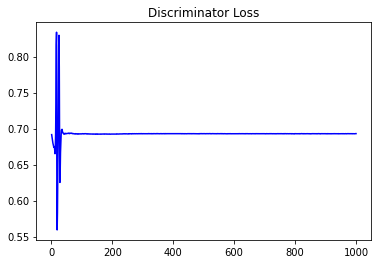

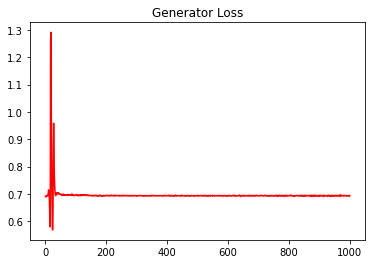

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06616211489011832


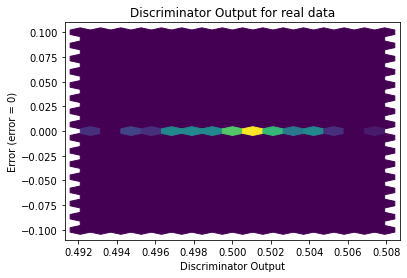

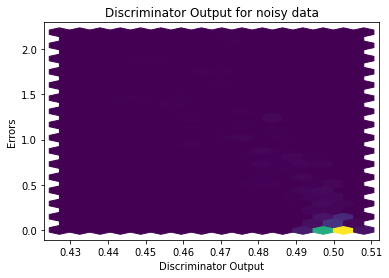

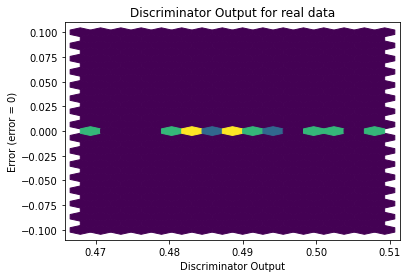

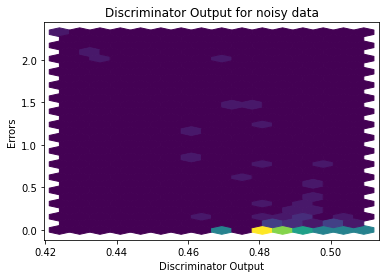

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


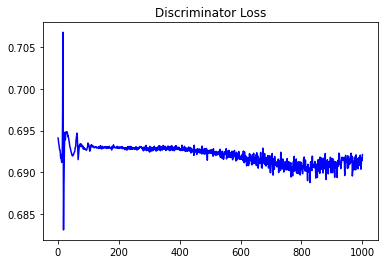

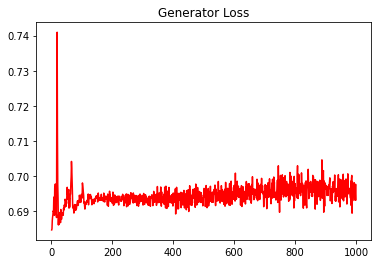

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08316423508433642


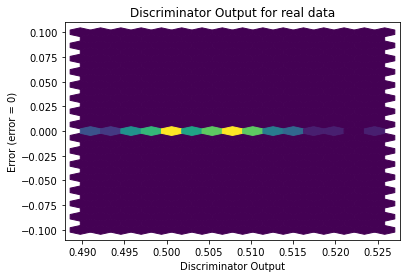

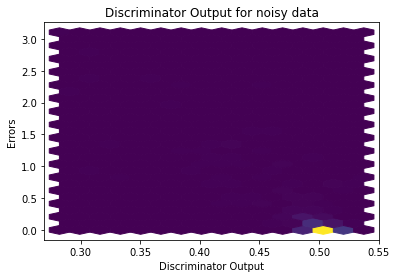

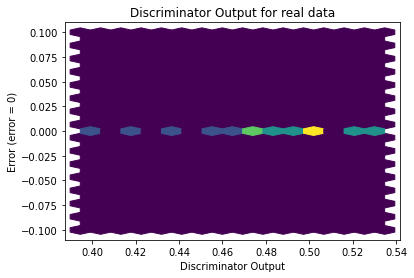

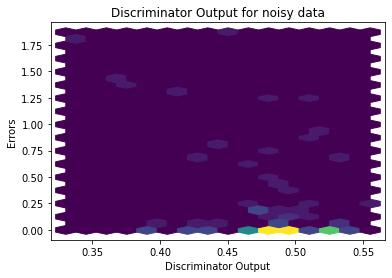

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0662]], requires_grad=True)
